In [ ]:
!pip install transformers datasets

#Pipeline Usage
- pipeline() is easiest way to use pretrained model for a specific task
- The pipeline supports many common tasks

In [4]:
from transformers import pipeline
from transformers.pipelines import SUPPORTED_TASKS

# List all supported tasks
for task, details in SUPPORTED_TASKS.items():
    print(f"Task: {task}")
    print(f"Details: {details}")
    print("-" * 50)



Task: audio-classification
Details: {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
--------------------------------------------------
Task: automatic-speech-recognition
Details: {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '22aad52')}}, 'type': 'multimodal'}
--------------------------------------------------
Task: text-to-audio
Details: {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_aut

```Task: <Task Name>
Details:
{
    'impl': <Pipeline Implementation Class>,  # Class implementing the task pipeline.
    'tf': (<TensorFlow Models Supported>,),  # TensorFlow model classes for the task.
    'pt': (<PyTorch Models Supported>,),  # PyTorch model classes for the task.
    'default': {
        'model': {
            'pt': (<Default PyTorch Model>, <Version Hash>),  # Default PyTorch model.
            'tf': (<Default TensorFlow Model>, <Version Hash>)  # Default TensorFlow model.
        },
        'config': {
            'pt': (<PyTorch Config>, <Version Hash>),  # PyTorch config (optional).
            'tf': (<TensorFlow Config>, <Version Hash>)  # TensorFlow config (optional).
        }
    },
    'type': <Task Type>  # Input type: 'text', 'image', 'audio', etc.
}
--------------------------------------------------


In [7]:
from datasets import load_dataset

# Load the beans dataset
dataset = load_dataset("beans")
print(dataset)


README.md:   0%|          | 0.00/4.95k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})


In [23]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import list_datasets

# Fetch the list of datasets
all_datasets = list(list_datasets())  # Convert the generator to a list

# Display dataset details for the first 5 datasets
print("Available datasets (first 20):\n")
for dataset in all_datasets[:20]:
    # Handle datasets with missing cardData
    card_data = dataset.cardData or {}

    dataset_info = (
        f"Name: {dataset.id}\n"
        f"Type: {card_data.get('taskCategories', 'Unknown')}\n"
        f"Labels: {card_data.get('tags', 'Unknown')}\n"
    )
    print(dataset_info + "-" * 50)



All datasets: https://huggingface.co/datasets

#Image classification
- Utilizing Hugging Face's pipeline and a pre-trained model

In [25]:
from datasets import load_dataset

# Load the beans dataset
dataset = load_dataset("beans")

# Inspect the dataset
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})


In [69]:
#import matplotlib.pyplot as plt

# Display the first image and its label
image = dataset['train'][0]['image']
label = dataset['train'][0]['labels']
label_names = dataset['train'].features['labels'].names
print(f"Labels: {label_names}")

#plt.imshow(image) \nLabel: {label_names[label]}
# plt.title(f"All Labels: {label_names}")
# plt.axis('off')
# plt.show()


Labels: ['angular_leaf_spot', 'bean_rust', 'healthy']


##Use the Image Classification Pipeline
- Using a pre-trained model for image classification: "google/vit-base-patch16-224"

In [57]:
from transformers import pipeline

# Initialize the image classification pipeline
image_classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

# Classify an image from the dataset
result = image_classifier(image)
print(result)


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': 'cucumber, cuke', 'score': 0.3829086124897003}, {'label': 'head cabbage', 'score': 0.03966427966952324}, {'label': 'ant, emmet, pismire', 'score': 0.02600327879190445}, {'label': 'zucchini, courgette', 'score': 0.024968288838863373}, {'label': 'ear, spike, capitulum', 'score': 0.020513491705060005}]


####The ViT model used was trained on ImageNet, which includes 1,000 generic object categories (like "cucumber", "zucchini", etc.). It does not know about the specific beans dataset labels.

To get meaningful predictions, you need:

1. A model fine-tuned on the beans dataset.
2. To fine-tune a pre-trained model yourself on the beans dataset.

##Use the Beans Dataset Correctly

###Fine-Tune a Pre-Trained Model on Beans Dataset


####Prepare the Dataset

In [53]:
from datasets import load_dataset
from transformers import AutoImageProcessor

# Load the dataset
dataset = load_dataset("beans")

# Load the image processor
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Preprocess the dataset
def preprocess_data(example):
    # Process the image into pixel_values
    inputs = image_processor(example["image"], return_tensors="pt")
    example["pixel_values"] = inputs["pixel_values"].squeeze(0)  # Ensure tensor format
    return example

# Apply preprocessing
prepared_dataset = dataset.map(preprocess_data)

# Verify the preprocessing
print(prepared_dataset["train"][0])


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

Map:   0%|          | 0/133 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7A6EB4B79E70>, 'labels': 0, 'pixel_values': [[[-0.5686274766921997, -0.5686274766921997, -0.5607843399047852, -0.4588235020637512, -0.06666666269302368, 0.32549023628234863, 0.46666669845581055, 0.5843137502670288, 0.6549019813537598, 0.7019608020782471, 0.7176470756530762, 0.7254902124404907, 0.7411764860153198, 0.7490196228027344, 0.7176470756530762, 0.6470588445663452, 0.5686274766921997, 0.45098042488098145, 0.2862745523452759, 0.23137259483337402, 0.40392160415649414, 0.4117647409439087, 0.23137259483337402, -0.07450979948043823, -0.2235293984413147, -0.3019607663154602, -0.529411792755127, -0.6235294342041016, -0.5137255191802979, -0.38823527097702026, -0.4117646813392639, -0.5215686559677124, -0.58431375

####Fine-Tune the Model

In [56]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
import torch

# Load the model
model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=3,  # Number of classes in beans dataset
    ignore_mismatched_sizes=True,  # Handle classifier size mismatch
)

# Define the data collator
def collate_fn(batch):
    return {
        "pixel_values": torch.stack([torch.tensor(item["pixel_values"]) for item in batch]),  # Convert to tensor
        "labels": torch.tensor([item["labels"] for item in batch]),  # Convert labels to tensor
    }

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    save_total_limit=2,
    logging_dir="./logs",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=prepared_dataset["train"],
    eval_dataset=prepared_dataset["validation"],
    data_collator=collate_fn,
)

# Train the model
trainer.train()


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TrainOutput(global_step=325, training_loss=0.05675662700946514, metrics={'train_runtime': 848.0636, 'train_samples_per_second': 6.096, 'train_steps_per_second': 0.383, 'total_flos': 4.006371770595533e+17, 'train_loss': 0.05675662700946514, 'epoch': 5.0})

In [60]:
model.save_pretrained("./beans_classifier")

In [61]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

# Load the fine-tuned model and image processor
model = AutoModelForImageClassification.from_pretrained("./beans_classifier")
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


In [ ]:
import torch

# Preprocess the test dataset
def preprocess_data(example):
    inputs = image_processor(example["image"], return_tensors="pt")
    example["pixel_values"] = inputs["pixel_values"][0]
    return example

prepared_test_dataset = dataset["test"].map(preprocess_data)

# Perform predictions
model.eval()  # Set model to evaluation mode
predictions = []
with torch.no_grad():
    for example in prepared_test_dataset:
        pixel_values = torch.tensor(example["pixel_values"]).unsqueeze(0)  # Add batch dimension
        outputs = model(pixel_values)
        logits = outputs.logits
        predicted_class = logits.argmax(dim=-1).item()  # Get class with highest score
        predictions.append(predicted_class)

# Map predicted class indices to class names
label_names = dataset["train"].features["labels"].names
predicted_labels = [label_names[p] for p in predictions]

print(predicted_labels)


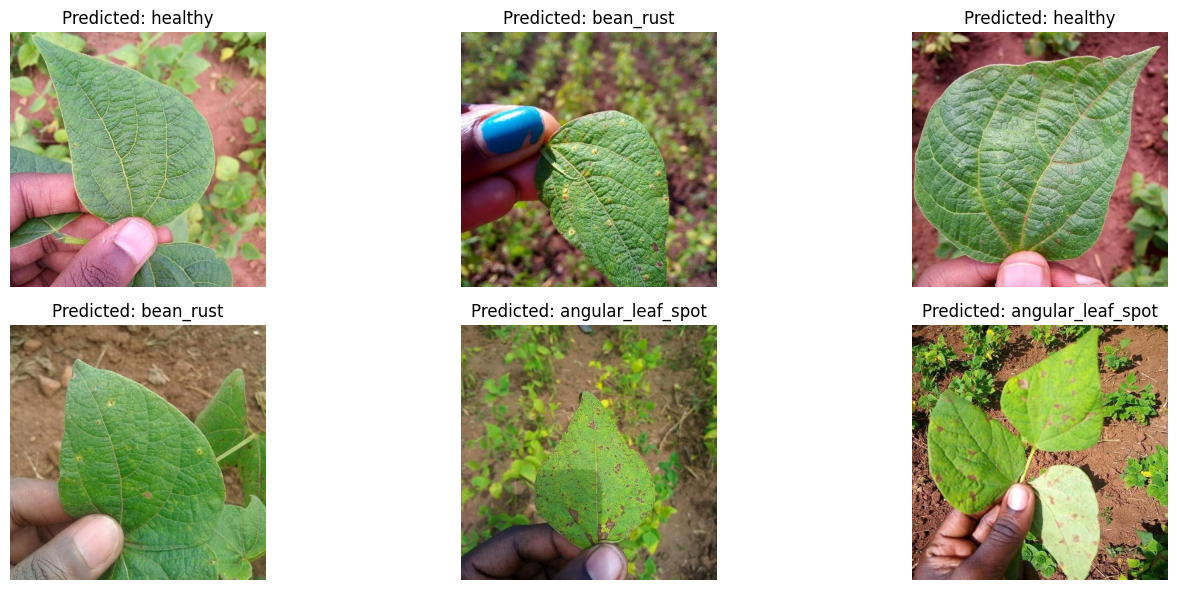

In [70]:
import random
import matplotlib.pyplot as plt
import torch

# Preprocess the test dataset
prepared_test_dataset = dataset["test"].map(
    lambda x: {"pixel_values": image_processor(x["image"], return_tensors="pt")["pixel_values"][0]}
)

# Randomly select 10 samples
random_samples = random.sample(list(prepared_test_dataset), 6)

# Predict and visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
for ax, sample in zip(axes.flatten(), random_samples):
    pixel_values = torch.tensor(sample["pixel_values"]).unsqueeze(0)
    logits = model(pixel_values).logits
    predicted_label = dataset["train"].features["labels"].names[logits.argmax(dim=-1).item()]

    ax.imshow(sample["image"])
    ax.set_title(f"Predicted: {predicted_label}")
    ax.axis("off")

plt.tight_layout()
plt.show()
